**Into to Random Forests**

Welcome to Introduction to Machine Learning for Coders! Lesson 1 will show you how to create a “random forest” - perhaps the most widely applicable machine learning model - to create a solution to the “Bull Book for Bulldozers” Kaggle competition, which will get you in to the top 25% on the leaderboard. You’ll learn how to use a Jupyter Notebook to build and analyze models, how to download data, and other basic skills you need to get started with machine learning in practice.

In [1]:
#When you start back again the below 2 lines will reload the previous work where you last left
%load_ext autoreload 
%autoreload 2

#Inline allows you to show the matplitlib graphs inline
%matplotlib inline 

In [2]:
#Importing all the libraries required for this cell
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

Now if you want to know what does a particular library do and what is the code running behind it, then do the following things
If you want to get the description of a library and its function then type 

**?ImportName**

OR ShiftTab

If you want to view the source code of import then type

**??ImportName**

OR ShiftTab twice

Courtesy fast.ai

In [3]:
?RandomForestRegressor

Init signature: RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and use averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported c

In [4]:
??RandomForestRegressor

Init signature: RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
Source:        
class RandomForestRegressor(ForestRegressor):
    """A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and use averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

    criteri

In [5]:
PATH = "data/"

To check if the path is valid type the below shell command.
To execute shell commands from jupyter-notebook, we insert '!' before the command, and to use python variable in shell command we use '{}'

In [6]:
!ls {PATH}

Train.csv


### About this dataset ###
We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

### Reading the Data

Usually the data we get is in CSV format, we can read the data using the shell command 

!head data/Train.csv

but this is difficult to read.So we use **Pandas** which is tool used to read our dataset, many inbuilt functions are there in pandas, which makes our life quite easy. 

In [7]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,parse_dates=['saledate'])
#We are using pandas dataframe here and all the data is imported into this dataframe
#low_memory - Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference. 
#To ensure no mixed types either set False, or specify the type with the dtype parameter

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [8]:
#To view the dataframe just type the name of the dataframe is there are too many rows and cols it'll truncate it automatically
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [9]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

Here np is Numpy library, basically it lets us treat array, matrices, vector, high dimensinal tensors as python variable, so we can do stuff like log 
Numpy and Pandas work very nicely

### Initial Processing 

In [10]:
m = RandomForestRegressor(n_jobs = -1)
#with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core. In linux with 4 cores I can clearly see 
#the cpu usage:(100%,~5%, ~5%, ~5%) when I run n_jobs=1 and (100%, 100%, 100%, 100%) 
#when running with n_jobs=-1.Each process takes the 100% usage of a given core, but if you have n_jobs=1 only one core is used.
m.fit(df_raw.drop('SalePrice', axis = 1), df_raw.SalePrice) #Here we are fitting X = All except SalePrice and Y = SalePrice

ValueError: could not convert string to float: 'Conventional'

Here we are using RandomForestRegressor, as we have to predict continious values(So regressor).If we had a classification problem then we would have used RandomForestClassifier
The reason for error is given at the end or the stacktrace

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [ ]:
#we'll use datepart to extract meaning from datefield
?add_datepart

In [ ]:
fld = df_raw.saledate

In [11]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [12]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [13]:
#we have solved the date part but many columns still contains string
?df_raw.head()

Signature: df_raw.head(n=5)
Docstring:
Return the first n rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
obj_head : type of caller
    The first n rows of the caller object.
File:      ~/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py
Type:      method


The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

In [14]:
train_cats(df_raw)

In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
#inplace make the changes in same dataframe, and here we are just making the order of categories according to us.

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [17]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [18]:
df_raw.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                       int8
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [19]:
#checking how many empty in series
df_raw.isnull().sum().sort_index()/len(df_raw)

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

Save the file until now, so we can reuse it from where we left when we come back.It saves whatever is there in RAM to HD

In [22]:
os.mkdir('tmp')
df_raw.to_feather('tmp/raw')

FileExistsError: [Errno 17] File exists: 'tmp'

### PreProcessing

In the future we can simply read it from this fast format.

In [23]:
df_raw = pd.read_feather('tmp/raw')

/home/jarvis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [20]:
#proc_df will make a copy of dataframe ,seperate the dependant variable and then it'll fix the missing values and categorical variable
df, y, nas = proc_df(df_raw, 'SalePrice')

In [21]:
#now everything is a number
df.dtypes

SalesID                          int64
MachineID                        int64
ModelID                          int64
datasource                       int64
auctioneerID                   float64
YearMade                         int64
MachineHoursCurrentMeter       float64
UsageBand                         int8
fiModelDesc                      int16
fiBaseModel                      int16
fiSecondaryDesc                  int16
fiModelSeries                     int8
fiModelDescriptor                int16
ProductSize                       int8
fiProductClassDesc                int8
state                             int8
ProductGroup                      int8
ProductGroupDesc                  int8
Drive_System                      int8
Enclosure                         int8
Forks                             int8
Pad_Type                          int8
Ride_Control                      int8
Stick                             int8
Transmission                      int8
Turbocharged             

In [22]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

0.9831128714370382

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly the most important idea in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it. And suppose you have lots of parameters:

[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [23]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## Base model

Let's try our model again, this time with separate training and validation sets.

In [24]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [25]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 55s, sys: 414 ms, total: 1min 55s
Wall time: 35.6 s
[0.09044167566903864, 0.2490695466538743, 0.9829048850079097, 0.8892128897328665]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

### Speed up the things

For testing purpose usually we'll like to speed up the things as for loading the libraries, preprocessing and took some time and if we start training 
on whole lot of data then it can usually take a lot of time, so we can speed up the things by just training out model on certain amount of subset
so that it gets executed quite faster and then we can do experiment with this subset, so once we find proper hyperparameters, and tuning and once every trail and error method is done,we can run it on whole dataset (overnight)./

In [26]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _= split_vals(df_trn, 20000)
y_train, _= split_vals(y_trn, 20000)

In [37]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 4.31 s, sys: 8.03 ms, total: 4.32 s
Wall time: 1.39 s
[0.11233690641667125, 0.35558294127025014, 0.9725116870064862, 0.7741969468195714]


On whole dataset it took 33.9s to train and fit the model, while it only took 1.39s on our 30000 sample subset.

### Single tree

Now we'll take a look how single tree looks like, in randomforest estimator is a parameter which expects to input the number of trees we want, 
so to experiment on 1 tree we set estimator to 1 to get a feel how single tree works.

Here depth is how much height we want the tree to go, so we'll keep it limited to 3 for our learning purpose.

In [42]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 180 ms
[0.5223870477102852, 0.5824866007232452, 0.40558745298861587, 0.3940736307060495]


We can see the results pretty worse, but that is with use of just 1 tree with depth of 3, the tree looks like shown below.

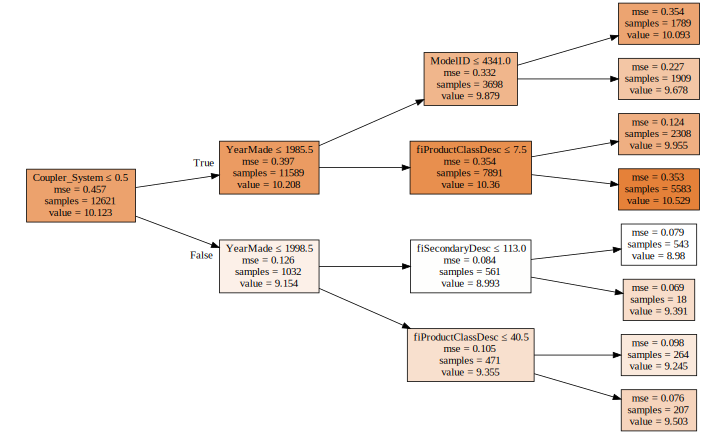

In [45]:
draw_tree(m.estimators_[0], df_trn, precision=3)

Now lets remove the limitation on depth and see how it increases the model.For this we have to manually set the bootstrap to false

In [46]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 492 ms, sys: 8.04 ms, total: 500 ms
Wall time: 582 ms
[6.879800455918813e-17, 0.4702525701645459, 1.0, 0.6050789075443077]



The training set result looks great! But the validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

### Bagging 

** Intro to bagging **

In bagging we create multiple trees(consider them as bag) then each of tree is giving random rows of data(consider every 10th for eg) and each tree can split on different feature.

So now each of the tree will work pretty good on the previously selected dataset, so it is kind of overfitting to that dataset only, but such multiple trees are made and thus at the end during testing data is fed to each tree and we take the mean of the result of each tree.
Thus it gives great results.

In [27]:
#by default n_estimators are 10, so we'll built a model that works on 10 trees first and check the result
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.11218857600991372, 0.3533300071600691, 0.972451992405527, 0.7770492085394864]


training set accuracy is quite good but the validation set accuracy is kind of underfitting, so we increase the number of trees

In [28]:
m = RandomForestRegressor(n_estimators=20,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10105834352961032, 0.3407581740514441, 0.9776469250940563, 0.7926325730902433]


In [29]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09662191172328391, 0.3422250106442195, 0.9795664335347455, 0.7908434520587851]


In [30]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09349666327818286, 0.3385251331479793, 0.9808669085741692, 0.7953414894411102]


We'll grab the predictions for each individual tree, and look at one example.


In [52]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [57]:
preds[:, 0], np.mean(preds[:,0]),  y_valid[0]

(array([8.92266, 8.92266, 8.9872 , 9.21034, 9.07681, 9.30565, 9.21034, 8.9872 , 8.92266, 9.39266, 9.10498,
        9.12696, 8.92266, 9.39266, 9.21034, 9.5819 , 9.23503, 9.04782, 9.04782, 9.4727 , 9.3501 , 9.25913,
        8.9872 , 8.92266, 9.30565, 9.68034, 9.39266, 9.68034, 8.92266, 9.4727 , 9.39266, 9.25913, 9.10498,
        8.9872 , 8.92266, 8.92266, 9.32812, 9.01797, 8.9872 , 9.25913, 8.9359 , 8.92266, 9.25913, 9.68034,
        9.39266, 8.92266, 9.01797, 9.12696, 9.25913, 8.9359 , 9.21034, 9.04782, 9.74097, 9.10498, 8.9872 ,
        9.04782, 9.10498, 8.9359 , 9.39266, 8.9872 , 9.04782, 9.01797, 8.92266, 9.21034, 8.92266, 8.9359 ,
        9.01797, 8.9359 , 9.4727 , 9.13238, 9.21034, 8.92266, 9.5819 , 8.9359 , 8.9359 , 8.92266, 8.9359 ,
        9.10498, 9.30565, 9.39266]), 9.15142836330153, 9.104979856318357)

We can see the predicted and the actual value are quite close

In [58]:
preds.shape


(80, 12000)

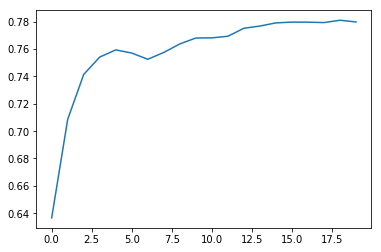

In [59]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

###  Out-of-bag (OOB) score


Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [31]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09687421381896415, 0.3443678793836743, 0.9794595806985749, 0.7882159513302659, 0.8529877843967564]


### Subsampling way to reduce overfitting

So now what we are doing is just testing on 30000 rows of data, which can be another reason for our validation score going low

Instead of taking only subset of data what can we do is, with random forest we have this special set_rf_sample method which has this idea

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.


It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [32]:
set_rf_samples(20000)

In [33]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2267939216367999, 0.2634098612661196, 0.8925026773992588, 0.8760883804923898, 0.8810571128317337]


We can clealy see that there is no over fitting as training, validation and also the OOB score are close

In [64]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.23882209208582592, 0.2646387163763385, 0.8807979229210194, 0.8749295430179181, 0.8737814500182179]


In [34]:
reset_rf_samples()


In [36]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07835973980701005, 0.23713321619938324, 0.9871672185925053, 0.8995771003516052, 0.9083248072639452]


Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [37]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [38]:
t=m.estimators_[0].tree_

In [39]:
dectree_max_depth(t)


46

In [40]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


[0.14055908260404584, 0.23330521745194344, 0.9587092611629372, 0.9027931486052276, 0.9072360151063201]


In [41]:
t=m.estimators_[0].tree_
dectree_max_depth(t)

35


Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.

None
0.5
'sqrt'
1, 3, 5, 10, 25, 100

In [42]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11924582054064034, 0.22782477581048008, 0.9702818918549507, 0.9073063727457409, 0.9115434431408433]


We get the best result among all the variations we have tried ! 0.227 will land us within top 12 of that kaggle competition

We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - bu/t we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs show an example of different max_features methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models: